In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [61]:
train_data=pd.read_excel(r"C:\Users\Abhilash\Desktop\Data Trained\Projects\Dataset\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")

In [62]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h 00m,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [63]:
pd.set_option('display.max_columns',None)

In [64]:
#We see for 0 index the date of journey is 24/3/2021 however thearrival time its showing 22 mar not practically possible

In [65]:
#Here we are seeing all are in object type except that of the Price which is the integer.

In [66]:
#On an overview computer will not be able to understand the format of the date and time as mentioned in the dataset.


In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [68]:

len('2h 50m')

6

In [69]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
33h 45m      1
27h 55m      1
29h 40m      1
27h 30m      1
40h 20m      1
Name: Duration, Length: 367, dtype: int64

In [70]:
train_data.dropna(inplace=True)

In [71]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [72]:
train_data["Journey_day"]= pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [73]:

train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [74]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h 00m,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [75]:
#I have created a sepearate column for the day and month which is easily in the format better than Date_of_Journey

In [76]:
#i would not require the Date_of_Journey i would remove that as well


In [77]:
train_data.drop(["Date_of_Journey"],axis=1 , inplace=True)

In [78]:
#Departure time is when a plane leaves the gate.
#similiar to Date_of_Journey we can extract valuesmfrom Dep_Time

In [79]:
train_data["Dep_hour"] =  pd.to_datetime(train_data["Dep_Time"]).dt.hour #Extracting Hours

#Extracting minutes

train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute



In [80]:
# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"],axis=1,inplace=True)

In [81]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h 00m,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [82]:
#We can design the data same for the  Arrival Time as well :


In [83]:
train_data["Arrival_hour"] =  pd.to_datetime(train_data.Arrival_Time).dt.hour #Extracting Hours

#Extracting minutes

train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute


In [84]:
# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [85]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 00m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [86]:
duration = list(train_data["Duration"])

In [87]:
#Time taken by the plane to reach teh destination is what is Duration
#It is the diffrence between Departure time and arrival time

#let me now convert duration column into list

   
    

In [88]:
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + "0m"
        else:
            duration[i] = "0h" + duration[i]
            
duration_hours=[]
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))
    
            

In [89]:
train_data["duration_hours"]=duration_hours
train_data["duration_mins"]=duration_mins


In [90]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 00m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [91]:
train_data.drop(["Duration"],axis=1,inplace=True)

In [92]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [93]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

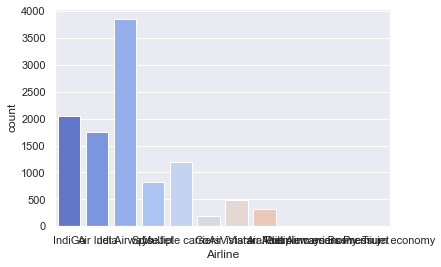

In [62]:
sns.countplot(train_data['Airline'],palette='coolwarm',data=train_data)

<AxesSubplot:xlabel='Airline', ylabel='count'>

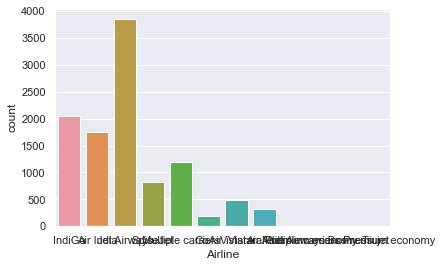

In [63]:
sns.countplot(train_data['Airline'])

<function matplotlib.pyplot.show(close=None, block=None)>

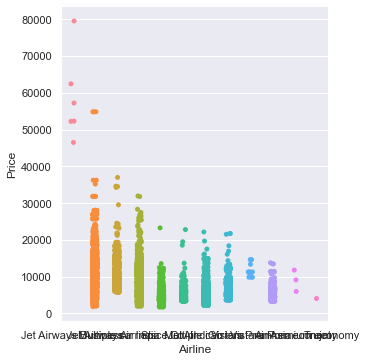

In [64]:
#Lemme check with the Airline vs Price
sns.catplot(y="Price",x="Airline",data = train_data.sort_values("Price",ascending = False))
plt.show

In [94]:
#Lets perform One hot encoding'

Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [67]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [95]:

Source = train_data[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [96]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [97]:
Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [98]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10677                BLR → DEL
10678          BLR → BOM → DEL
10679    BOM → BDQ → DEL → HYD
10680          CCU → DEL → BLR
10681    DEL → HYD → BOM → COK
Name: Route, Length: 10681, dtype: object

In [107]:
#Lets remove some unwanted columns 

train_data.drop(["Route","Additional_Info"],axis=1 , inplace=True)

KeyError: "['Route' 'Additional_Info'] not found in axis"

In [108]:
train_data["Total_Stops"].value_counts()

1    5625
0    3491
2    1519
3      45
4       1
Name: Total_Stops, dtype: int64

In [109]:
train_data.replace({"non-stop":0,"1 stop":1 , "2 stops":2 , "3 stops" :3 , "4 stops":4},inplace =True)

In [110]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [111]:
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [112]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [113]:
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [114]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [104]:
data_train.shape

(10681, 32)

# Now let me call in Test Data

In [143]:
test_data=pd.read_excel(r"C:\Users\Abhilash\Desktop\Data Trained\Projects\Dataset\Flight_Ticket_Participant_Datasets\Test_set.xlsx")

In [144]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
2,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
3,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
4,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info


In [145]:
pd.set_option('display.max_columns',None)

In [146]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [147]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [148]:
test_data.dropna(inplace=True)

In [149]:
test_data["Journey_day"]= pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [150]:
test_data["Journey_day"]= pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data.head()
test_data.drop(["Date_of_Journey"],axis=1 , inplace=True)
test_data["Dep_hour"] =  pd.to_datetime(test_data["Dep_Time"]).dt.hour #Extracting Hours

#Extracting minutes

test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
test_data.drop(["Dep_Time"],axis=1,inplace=True)

test_data.head()

test_data["Arrival_hour"] =  pd.to_datetime(test_data.Arrival_Time).dt.hour #Extracting Hours

#Extracting minutes

test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
test_data.drop(["Arrival_Time"],axis=1,inplace=True)

test_data.head()

duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + "0m"
        else:
            duration[i] = "0h" + duration[i]
            
duration_hours=[]
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))


test_data["duration_hours"]=duration_hours
test_data["duration_mins"]=duration_mins


(2671, 28)

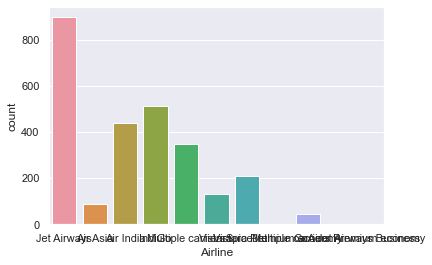

In [151]:
test_data.head()

test_data["Airline"].value_counts()

sns.countplot(test_data['Airline'],palette='coolwarm',data=test_data)

sns.countplot(test_data['Airline'])



Airline = test_data[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

train_data["Source"].value_counts()

Source = test_data[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

test_data["Destination"].value_counts()

Destination = test_data[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first = True)
Destination.head()

#Lets remove some unwanted columns 

test_data.drop(["Route","Additional_Info"],axis=1 , inplace=True)

test_data["Total_Stops"].value_counts()

test_data.replace({"non-stop":0,"1 stop":1 , "2 stops":2 , "3 stops" :3 , "4 stops":4},inplace =True)


data_test=pd.concat([test_data,Airline,Source,Destination],axis=1)

data_test.drop(["Airline","Source","Destination"],axis=1,inplace=True)

data_test.head()

data_test.shape

In [152]:
data_test.head()

,Duration,Total_Stops,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,10h 55m,1,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,23h 45m,1,21,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,2h 50m,0,24,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,18h 20m,1,12,18,15,12,35,18,20,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,15h 5m,1,12,7,30,22,35,15,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Feature Selection

In [153]:
data_train.shape

(10681, 30)

In [154]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [156]:
x=data_train.loc[:, ['Total_Stops',  'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

x.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [157]:
y=data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<AxesSubplot:>

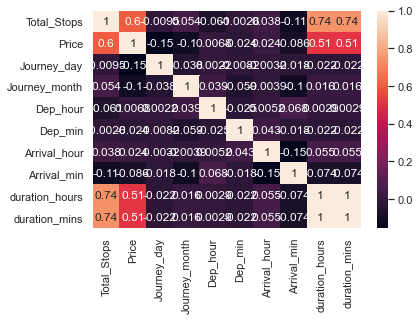

In [111]:

sns.heatmap(train_data.corr(),annot=True)

In [158]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [159]:
print(selection.feature_importances_)

[2.26295800e-01 1.44372509e-01 5.33631719e-02 2.45568619e-02
 2.11190252e-02 2.79060616e-02 1.87317808e-02 1.24312180e-01
 1.73416148e-02 9.51779789e-03 1.88043813e-03 1.88278632e-02
 1.34527465e-01 6.74932815e-02 1.78175264e-02 8.49148777e-04
 3.12294720e-03 1.04305494e-04 4.97814387e-03 8.73133385e-05
 4.65190526e-04 1.21200722e-02 3.22651515e-03 6.75257225e-03
 1.23745456e-02 1.54146721e-02 7.22626692e-03 4.89460444e-04
 2.47254686e-02]


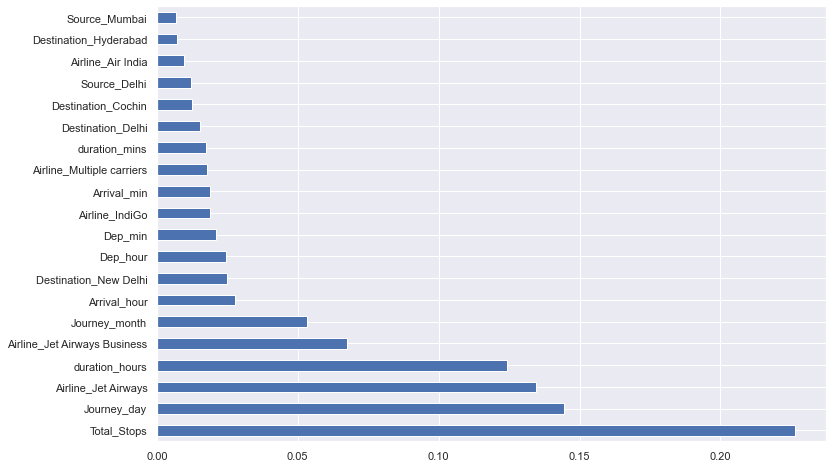

In [161]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importance = pd.Series(selection.feature_importances_,index=x.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=40)

# Random Forrest Regressor

In [165]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train , y_train)

RandomForestRegressor()

In [166]:
y_pred = reg_rf.predict(x_test)

In [167]:
reg_rf.score(x_train , y_train)

0.9571580118862664

reg_rf.score(x_test,y_test)

In [169]:
reg_rf.score(x_test , y_test)

0.7897012841171652

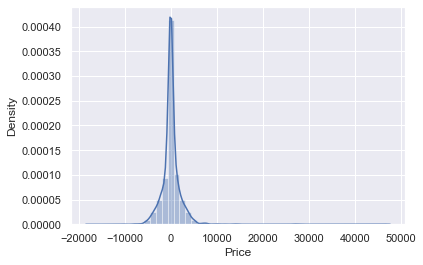

In [170]:
sns.distplot(y_test-y_pred)
plt.show()

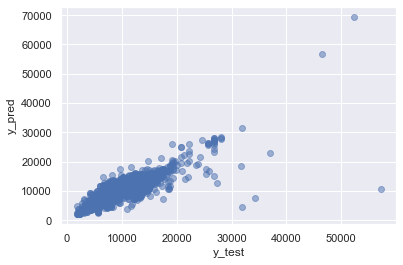

In [171]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [172]:
from sklearn import metrics

In [174]:
print('MAE:' ,metrics.mean_absolute_error(y_test,y_pred))
print('MAE:' ,metrics.mean_squared_error(y_test,y_pred))
print('MAE:' ,np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1174.263156737421
MAE: 4549991.720178264
MAE: 2133.070959949121


In [175]:
metrics.r2_score(y_test,y_pred)

0.7897012841171652

In [176]:
#Let me try tuning the data :

In [177]:
#Randomized searchCV

In [178]:
from sklearn.model_selection import RandomizedSearchCV

In [179]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [181]:
#Create the random grid
random_grid = { 'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth': max_depth,
                'min_samples_split':min_samples_split,
                'min_samples_leaf': min_samples_leaf}

In [182]:
rf_random = RandomizedSearchCV(estimator = reg_rf,param_distributions = random_grid , scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42 , n_jobs=1)

In [183]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [185]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [186]:
prediction = rf_random.predict(x_test)

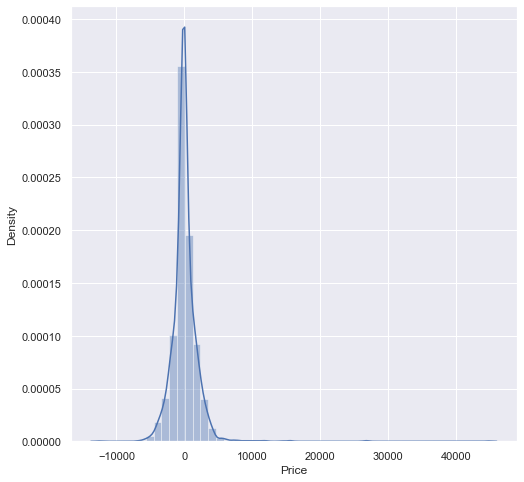

In [187]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [195]:
import pickle
file=open('flight_rf.pkl','wb')

pickle.dump(reg_rf,file)

In [200]:
model=open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [197]:
y_prediction = forest.predict(x_test)

In [198]:
metrics.r2_score(y_test,y_prediction)

0.7897012841171652

In [199]:
#Here we got 78 %

In [202]:
import pickle
file=open('flight_rf.pkl','wb')

pickle.dump(rf_random,file)

In [203]:
model=open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [204]:
y_prediction = forest.predict(x_test)

In [205]:
metrics.r2_score(y_test,y_prediction)

0.8135934936222495

In [206]:
#Now it has been improvised better with the hyperparameter tuning.

# Logistic Regression

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()

In [208]:

log_reg.fit(x_train,y_train)

LogisticRegression()

In [209]:
y_pred = log_reg.predict(x_test)

In [210]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.18315132605304213

# Gradient Boosting Technique

In [211]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [212]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred = gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))
print("\n================Train Result===========")
print(f"Accuracy score : {accuracy_score(y_train , pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_train , pred)}\n")


#*******************************Test Score*****************************************

pred = gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict = True))
print("\n====================Test Result=========================")
print(f"Accuracy score : {accuracy_score(y_test,pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_test , pred)}\n")

KeyboardInterrupt: 

In [213]:
#Taking more than 6 hours

# Decission Tree

In [214]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

        1759       0.00      0.00      0.00         3
        1840       0.00      0.00      0.00         1
        1965       0.27      0.40      0.32        10
        2017       0.25      0.15      0.19        13
        2050       1.00      0.25      0.40         4
        2071       0.00      0.00      0.00         0
        2175       0.00      0.00      0.00         1
        2227       0.80      0.75      0.77        16
        2228       0.00      0.00      0.00         1
        2385       0.00      0.00      0.00         1
        2437       0.00      0.00      0.00         1
        2575       0.25      1.00      0.40         1
        2647       0.00      0.00      0.00         1
        2753       0.17      0.50      0.25         2
        2754       0.64      0.75      0.69        12
        2759       0.00      0.00      0.00         2
        3100       0.92      0.75      0.83        16
        3145       0.00    

In [226]:
#Off all we ahve random forrest as the best saved the model with the same

# Thank You